### What Are Embeddings?
Think of embeddings as a way to translate words into a language that computers understand - numbers!

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

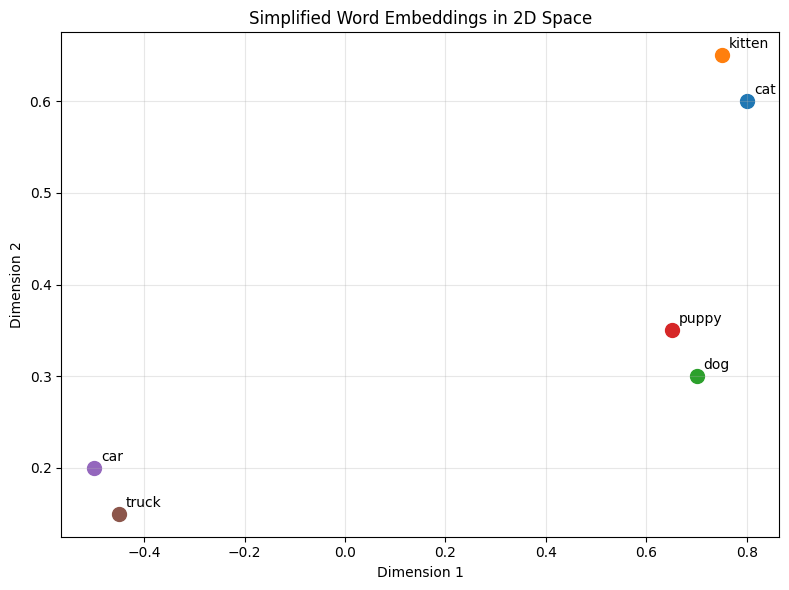

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Measuring Similarity

In [7]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product=np.dot(vec1,vec2)
    norm_a=np.linalg.norm(vec1)
    norm_b=np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)



In [8]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity=cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192183


In [9]:
cosine_similarity(cat_vector,car_vector)

np.float64(-0.4371858854891681)

### Creating Your First Embeddings

In [11]:
### Huggingface And OpenAI Models

from langchain_huggingface import HuggingFaceEmbeddings

## Initialize a simple Embedding model(no API Key needed!)
embeddings=HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings

/home/bjit/Desktop/Storage01/SelfDevelopment/Rag_Course/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [12]:
## create your first embeddings
text="Hello, I am learning about embeddings!"

embedding=embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding length : {len(embedding)}")
print(embedding)
print(f"First 5 values: {embedding[:5]}")  # Print first 5 values for brevity


Text: Hello, I am learning about embeddings!
Embedding length : 384
[-0.01816331036388874, -0.0995517298579216, 0.013816066086292267, -0.008125897496938705, 0.014152191579341888, 0.06406482309103012, -0.006253311410546303, -0.003017887705937028, 0.025287210941314697, -0.02019864320755005, 0.024329736828804016, 0.07435058802366257, 0.05117716267704964, 0.022038448601961136, -0.05830616503953934, 0.015268269926309586, 0.023584425449371338, 0.09455399215221405, -0.06508851796388626, 0.013296706601977348, -0.020497633144259453, -0.05690856650471687, 0.03030330315232277, -0.08365611732006073, 0.0265963077545166, -0.015231494791805744, -0.04361537843942642, 0.053983982652425766, 0.09025716781616211, -0.08893882483243942, 0.03964456543326378, -0.0088350186124444, -0.030343780294060707, 0.07425560802221298, -0.0540991835296154, 0.11108007282018661, 0.03689988702535629, -0.008959762752056122, -0.06140240281820297, -0.0031433349940925837, 0.02195824682712555, 0.04220825806260109, -0.028937887400

In [13]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])

[0.1304018646478653, -0.011870167218148708, -0.028117001056671143, 0.05123862996697426, -0.055974528193473816, 0.030191566795110703, 0.030161330476403236, 0.02469833381474018, -0.018370550125837326, 0.05876672640442848, -0.024953193962574005, 0.0601542666554451, 0.039831679314374924, 0.0332304909825325, -0.061311401426792145, -0.04937310889363289, -0.05486348271369934, -0.04007613658905029, 0.05642910674214363, 0.039156582206487656, -0.034737054258584976, -0.013247690163552761, 0.03196616843342781, -0.06349922716617584, -0.06017853692173958, 0.07823453843593597, -0.028303833678364754, -0.04744284227490425, 0.04035929590463638, -0.006630896124988794, -0.0667409747838974, -0.004191345069557428, -0.025311700999736786, 0.05334164947271347, 0.017428075894713402, -0.09792359173297882, 0.006061302497982979, -0.06524171680212021, 0.04557260125875473, 0.023641761392354965, 0.07658479362726212, -0.010264377109706402, -0.004076785407960415, -0.06232286989688873, 0.03370523080229759, 0.01866110600

In [14]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications

